In [4]:
import torch
import torchaudio
import requests
import matplotlib.pyplot as plt

# Load sound as a raw waveform

Waveform is a tensor with shape [channels, time]

Shape of waveform:  torch.Size([2, 276858])


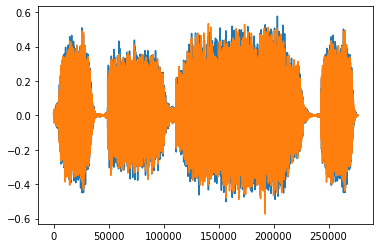

In [37]:
url = "https://pytorch.org/tutorials/_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
r = requests.get(url)

with open('steam-train.wav', 'wb') as f:
    f.write(r.content)
    
filename = 'steam-train.wav'
waveform, sample_rate = torchaudio.load(filename)

print('Shape of waveform: ', waveform.shape)

plt.figure()
plt.plot(waveform.t().numpy())

## and listen to it!

In [19]:
import IPython
IPython.display.Audio(data=waveform, rate=sample_rate)

# Transform the raw waveform into a Spectrogram

Spectogram is a tensor with shape [channels, frequencies, time].

We transform raw audio into "images". With this representation we can apply all the DL heavy machinery for computer vision :-)

Spectrogram shape:  torch.Size([2, 201, 1385])


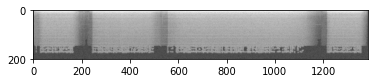

In [36]:
specgram = torchaudio.transforms.Spectrogram()(waveform)
print('Spectrogram shape: ', specgram.size())

plt.figure()
plt.imshow(specgram.log2()[0, :, :].numpy(), cmap='gray')

## another option is to use a Mel Spectrogram

Spectrogram shape:  torch.Size([2, 128, 1385])


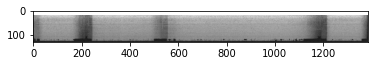

In [35]:
melspecgram = torchaudio.transforms.MelSpectrogram()(waveform)

print('Spectrogram shape: ', melspecgram.size())
plt.figure()
plt.imshow(melspecgram.log2()[0, :, :], cmap='gray')

In [ ]:
## either case